# Regresión Multivariable

## Implementación de regresion lineal en sklearn

In [1]:
# Import the NumPy library
import numpy as np

In [10]:
## Tomado del curso de introduccion a la regresion de AI-4-All-org 

#1. We import the linear regression model from Skicit-Learn library
from sklearn.linear_model import LinearRegression

#2. We load a toy dataset X as our training data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

#3.We define our target values y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

#4.We fit our linear model
regression = LinearRegression().fit(X, y)

#5.We can view the intercept of our model
intercept = regression.intercept_ 
print("The intercept for our model is {}".format(intercept))

#6.We can find out the accuracy of our model using R^2 score. 
# Keep in mind that the best possible score is 1.0
score = regression.score(X, y)
print("The score for our model is {}".format(score))

#7.We can make a prediction for a new value
regression.predict(np.array([[3, 5]]))


The intercept for our model is 3.000000000000001
The score for our model is 1.0


array([16.])

## Ejemplo, precio de casas

In [14]:
### DO NOT MODIFY ###
# Import Numpy, Matplotlib, Pandas, Skicit-Learn Data Science libraries to perform most of the heavy lifting for us
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.gridspec import GridSpec
import sklearn
import seaborn as sns

Matplotlib is building the font cache using fc-list. This may take a moment.


In [16]:
saratoga_df = pd.read_csv('saratoga-houses-clean-dataset.csv', sep=",", index_col=0)

In [17]:
saratoga_df.head()

,Price,age,landValue,livingArea,bedrooms,bathrooms,rooms,heating_hot air,heating_hot water/steam,fuel_gas,fuel_oil,waterfront_Yes,newConstruction_Yes,centralAir_Yes
0,-0.019677,0.019118,0.020005,-0.034210,-0.034314,-0.033167,-0.021179,0,0,0,0,0,0,0
1,-0.002664,-0.065027,0.000448,0.009006,-0.004353,0.022833,-0.010589,0,1,1,0,0,0,0
2,-0.030305,0.044546,-0.026598,0.008634,0.025609,-0.033167,0.010589,0,1,1,0,0,0,0
3,-0.011140,-0.005987,-0.003816,0.008634,-0.004353,-0.014500,-0.021179,1,0,1,0,0,0,0
4,-0.043167,-0.065027,-0.009156,-0.036935,-0.034314,-0.033167,-0.042357,1,0,1,0,0,1,1


In [18]:
# Display the size and shape of the saratoga_df
print("Size and shape of Saratoga dataframe are: {}".format(saratoga_df.shape))

Size and shape of Saratoga dataframe are: (1707, 14)


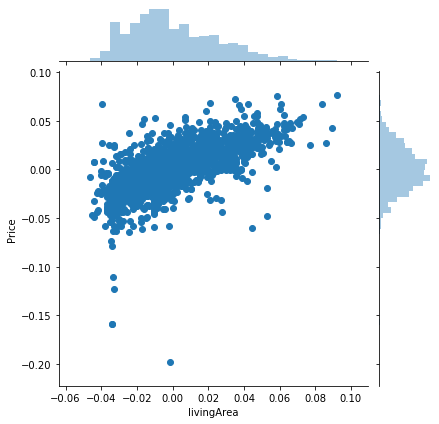

In [19]:
sns.jointplot(x=saratoga_df['livingArea'], y=saratoga_df['Price'])

In [20]:
#We will begin with dividing the saratoga_df dataframe into two parts, X and Y 
#X: All the independent variables(AKA the features)
#Y: The dependent variable (AKA the price of a house)
inputVariables=list(saratoga_df)
del inputVariables[0]
X=saratoga_df[inputVariables]
Y=saratoga_df['Price']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

# Display the size and shape of the training, and testing datasets
print("Size and shape of the training features are: {}".format(X_train.shape))
print("Size and shape of the training labels are: {}".format(Y_train.shape))
print("Size and shape of the testing features are: {}".format(X_test.shape))
print("Size and shape of the testing labels are: {}".format(Y_test.shape))

Size and shape of the training features are: (1365, 13)
Size and shape of the training labels are: (1365,)
Size and shape of the testing features are: (342, 13)
Size and shape of the testing labels are: (342,)


In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

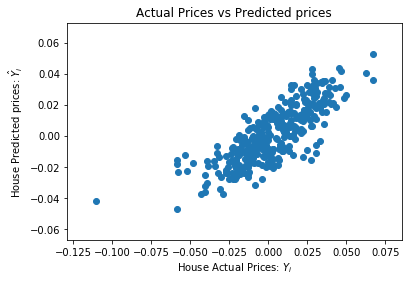

In [23]:
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("House Actual Prices: $Y_i$")
plt.ylabel("House Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices")

In [24]:
# Evaluation of the training set using Rsquared Score

from sklearn.metrics import r2_score

# model evaluation for the training set
y_train_predict = lm.predict(X_train)
r2 = r2_score(Y_train, y_train_predict)
print('The performance of the model on the training set')
print('--------------------------------------')
print('The R2 score is {}'.format(r2))
print('\n')


# model evaluation for the testing set
y_test_predict = lm.predict(X_test)
r2 = r2_score(Y_test, y_test_predict)
print('The performance of the model on the test set')
print('--------------------------------------')
print('The R2 score is {}'.format(r2)) 

The performance of the model on the training set
--------------------------------------
The R2 score is 0.545620736432787


The performance of the model on the test set
--------------------------------------
The R2 score is 0.6475386241890753
